## 0.0 - Imports 


In [69]:
# --- Imports --- #
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

import graphviz

# --- Settings --- #
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## 0.1 - Load Data

In [3]:
# --- Load Data --- #
dataframe = pd.read_csv('https://raw.githubusercontent.com/bert-bruno/case_miw/refs/heads/main/data/pre_processed_data_pre_clustering.csv')
# ---
dataframe.head() # Display the first 5 rows of the dataframe

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Age_Range
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,1,50-78
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,3,50-78
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,2,39-50
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,3,18-39
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,3,18-39


In [4]:
# --- Check dataframe information --- #
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   object 
 1   Marital_Status       2208 non-null   object 
 2   Income               2208 non-null   float64
 3   Kidhome              2208 non-null   int64  
 4   Teenhome             2208 non-null   int64  
 5   Recency              2208 non-null   int64  
 6   MntWines             2208 non-null   int64  
 7   MntFruits            2208 non-null   int64  
 8   MntMeatProducts      2208 non-null   int64  
 9   MntFishProducts      2208 non-null   int64  
 10  MntSweetProducts     2208 non-null   int64  
 11  MntGoldProds         2208 non-null   int64  
 12  NumDealsPurchases    2208 non-null   int64  
 13  NumWebPurchases      2208 non-null   int64  
 14  NumCatalogPurchases  2208 non-null   int64  
 15  NumStorePurchases    2208 non-null   i

## 0.2 - Categorical Features Encoding

In [5]:
# --- One Hot Encoding --- #
dataframe_categorical = dataframe[['Education', 'Marital_Status']] # Selecting the categorical columns.
dataframe = dataframe.drop(columns=['Education', 'Marital_Status']) # Dropping the categorical columns from original dataframe.
# ---
encoder = OneHotEncoder() # Creating the encoder object.
dummy_array = encoder.fit_transform(dataframe_categorical).toarray() # Encoding the categorical columns.
# ---
dataframe_categorical_dummy = pd.DataFrame(dummy_array, 
                                           columns=encoder.get_feature_names_out(
                                            ['Education', 'Marital_Status'])) # Creating a dataframe from the encoded array.
# ---
dataframe_dummy = pd.concat([dataframe, dataframe_categorical_dummy], axis=1) # Concatenating the original dataframe with the encoded dataframe.
dataframe_dummy = dataframe_dummy.drop(columns=['Age_Range'])
# ---
dataframe_dummy.head() # Display the first 5 rows of the dataframe

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## 0.3 - Scaling Features

In [6]:
# --- Standardization --- #
scaler = StandardScaler() # Creating the scaler object.
dataframe_scaled = pd.DataFrame(scaler.fit_transform(dataframe_dummy), columns=dataframe_dummy.columns) # Standardizing the dataframe.
# ---
dataframe_scaled.head() # Display the first 5 rows of the dataframe

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.309625,-0.824004,-0.929587,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,0.858552,0.352174,1.427120,2.506603,-0.555083,0.692301,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,2.381322,1.017915,-1.502099,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,1.915222,-0.590600,-0.188805
1,-0.258381,1.038228,0.907950,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,-0.733610,-0.167612,-1.125249,-0.570823,-1.169892,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,1.274437,1.417474,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,1.915222,-0.590600,-0.188805
2,0.958589,-0.824004,-0.929587,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,-0.034612,-0.687398,1.427120,-0.228887,1.289346,-0.545767,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,0.333858,-0.042313,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,-0.522133,1.693192,-0.188805
3,-1.207049,1.038228,-0.929587,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,-0.753027,-0.167612,-0.760624,-0.912759,-0.555083,0.279612,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,-1.290779,1.417474,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,-0.522133,1.693192,-0.188805
4,0.317090,1.038228,-0.929587,1.553545,-0.391748,0.420464,-0.218509,0.155277,-0.001587,-0.558861,1.391746,0.333248,0.113050,0.059727,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,-1.034258,1.417474,-0.313859,-0.158334,-1.009099,-0.444294,1.902432,-0.341824,1.255559,-0.522133,-0.590600,-0.188805


## 1.0 - PCA

In [84]:
# --- Principal Component Analysis --- #
pca = PCA(n_components=3) # Creating the PCA object.
dataframe_pca = pca.fit_transform(dataframe_scaled) # Applying PCA to the standardized dataframe.

## 2.0 - KMeans Clustering

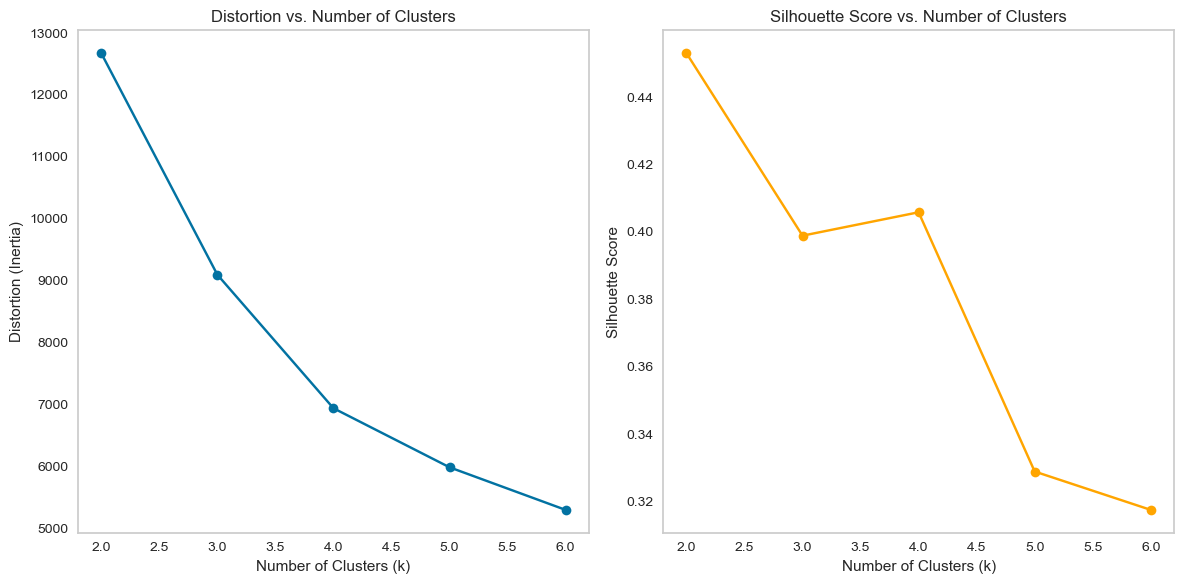

In [86]:
max_k = 6  # Set the maximum number of clusters to evaluate
distortions = []
silhouette_scores = []

# Iterate over different numbers of clusters (k values)
for k in range(2, max_k + 1):  # Starting from 2 for silhouette score
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataframe_pca)
    # ---
    # Get the distortion (inertia)
    distortions.append(kmeans.inertia_)
    # ---
    if k > 1:  # Silhouette score is not defined for k=1
        silhouette_avg = silhouette_score(dataframe_pca, kmeans.labels_) # Calculate the silhouette score
        silhouette_scores.append(silhouette_avg) # Append the silhouette score
    else:
        silhouette_scores.append(-1)  # Assign a default value for k=1
# --- Visualizing the Elbow Method --- #
plt.figure(figsize=(12, 6)) # Create a new figure to plot both metrics
# -- Plot distortion scores -- #
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), distortions, marker='o')
plt.title('Distortion vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid()
# -- Plot silhouette scores -- #
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
# -- Show both plots together -- #
plt.tight_layout()
plt.show()

For k=4, we've obtained the best combination of distortion vs silhouette scores.

In [88]:
# --- KMeans Clustering --- #
optimal_k = 4 # Optimal number of clusters
model = KMeans(n_clusters=optimal_k, random_state=42) # Creating the KMeans model object.
# ---
y_pred = model.fit_predict(dataframe_pca) # Fitting and predicting the model.
# ---
dataframe_dummy['Cluster'] = y_pred # Adding the cluster column to the dataframe.
# ---
dataframe_dummy['Cluster'].value_counts() # Displaying the number of samples in each cluster.

Cluster
0    957
3    593
2    483
1    175
Name: count, dtype: int64

In [89]:
dataframe_dummy.head() # Display the first 5 rows of the dataframe

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3


## 1.1 - Cluster Visualization

In [93]:
# --- Cluster Analysis --- #
clusters = dataframe_dummy['Cluster'] # Selecting the cluster column.
features = dataframe_dummy.drop(columns=['Cluster'], axis=1) # Selecting the features.
# --- Decision Tree --- # 
cluster_tree = tree.DecisionTreeClassifier(max_depth=6, min_samples_split=25, min_samples_leaf=10) # Creating the decision tree object.
cluster_tree.fit(features, clusters) # Fitting the decision tree.

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=25)

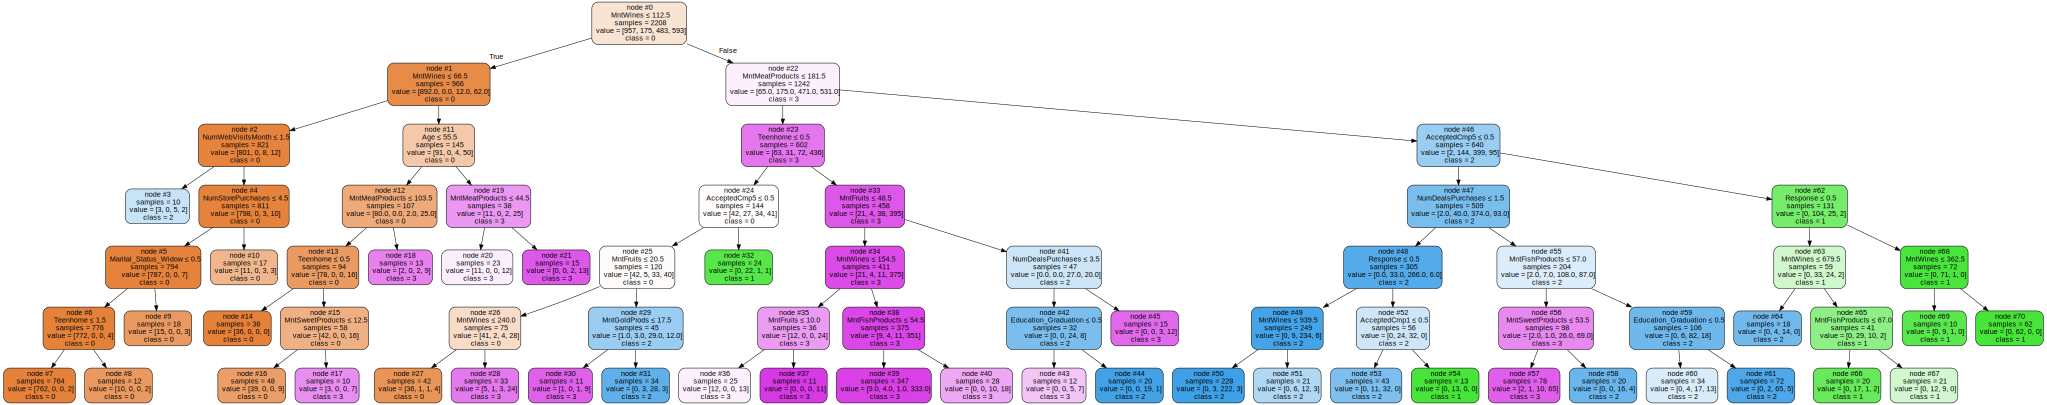

In [94]:
# --- Export Decision Tree --- #
export_graphviz(cluster_tree,
                feature_names=list(features.columns.values),
                out_file='cluster_tree.dot',
                class_names=np.unique(clusters.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label='all',
                leaves_parallel=False)

with open('cluster_tree.dot') as cluster_tree_image:
    cluster_tree_graph = cluster_tree_image.read()

graphviz.Source(cluster_tree_graph)

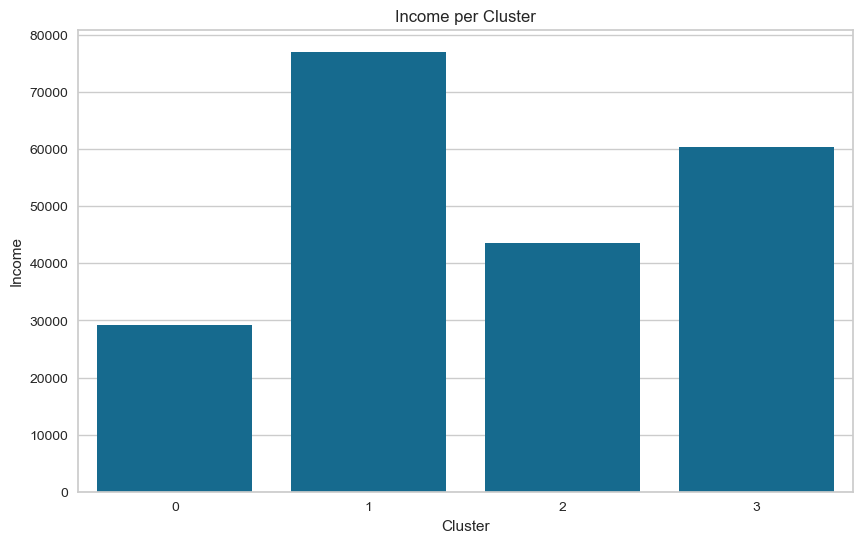

In [32]:
# --- Income Analysis per Cluster --- #
income_per_cluster = dataframe_dummy.groupby('Cluster')['Income'].mean().reset_index() # Calculating the mean income per cluster.
# ---
plt.figure(figsize=(10, 6)) # Creating the figure.
sns.barplot(x='Cluster', y='Income', data=income_per_cluster) # Creating the barplot.
plt.title('Income per Cluster') # Adding the title.
plt.xlabel('Cluster') # Adding the x-axis label.
plt.ylabel('Income') # Adding the y-axis label.
plt.show() # Displaying the plot.


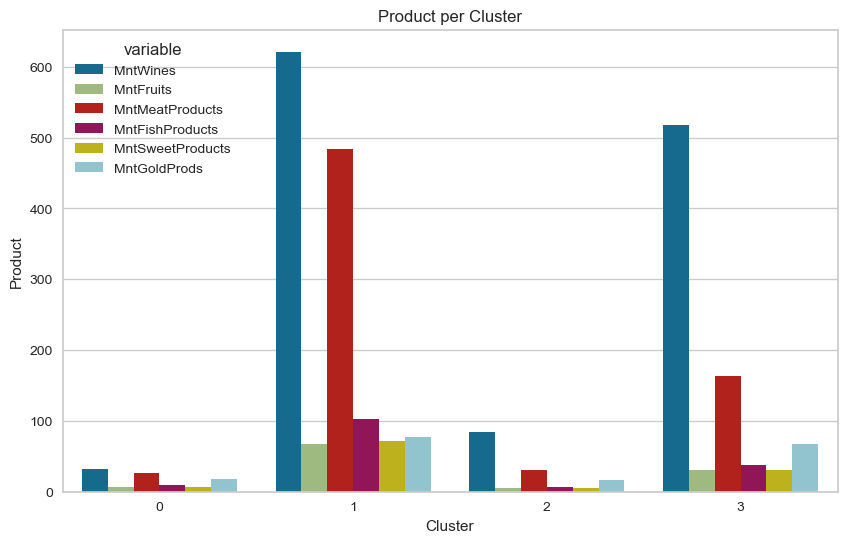

In [33]:
# --- Product Analysis per Cluster --- #
product_columns = ['MntWines', 
                   'MntFruits', 
                   'MntMeatProducts', 
                   'MntFishProducts', 
                   'MntSweetProducts', 
                   'MntGoldProds'] # Selecting the product columns.
# ---
product_per_cluster = dataframe_dummy.groupby('Cluster')[product_columns].mean().reset_index() # Calculating the mean product per cluster.
# ---
plt.figure(figsize=(10, 6)) # Creating the figure.
sns.barplot(x='Cluster', y='value', hue='variable', data=pd.melt(product_per_cluster, ['Cluster'])) # Creating the barplot.
plt.title('Product per Cluster') # Adding the title.
plt.xlabel('Cluster') # Adding the x-axis label.
plt.ylabel('Product') # Adding the y-axis label.
plt.show() # Displaying the plot.